# Stock Data
A stock is a general term used to describe the ownership certificates of any company. A share, on the other hand, refers to the stock certificate of a particular company. Holding a particular company's share makes you a shareholder. [https://economictimes.indiatimes.com/definition/stocks]

In [15]:
import yfinance as yf
import pandas as pd


import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
# Devon Energy Corp
Devon= yf.Ticker("DVN")

In [4]:
Devon_info = Devon.info
Devon_info

{'zip': '73102-5015',
 'sector': 'Energy',
 'fullTimeEmployees': 1600,
 'longBusinessSummary': 'Devon Energy Corporation, an independent energy company, primarily engages in the exploration, development, and production of oil, natural gas, and natural gas liquids in the United States. It operates approximately 5,134 gross wells. Devon Energy Corporation was incorporated in 1971 and is headquartered in Oklahoma City, Oklahoma.',
 'city': 'Oklahoma City',
 'phone': '405 235 3611',
 'state': 'OK',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'https://www.devonenergy.com',
 'maxAge': 1,
 'address1': '333 West Sheridan Avenue',
 'industry': 'Oil & Gas E&P',
 'ebitdaMargins': 0.41984,
 'profitMargins': 0.21445,
 'grossMargins': 0.56522,
 'operatingCashflow': 4898999808,
 'revenueGrowth': 2.003,
 'operatingMargins': 0.25288,
 'ebitda': 5506999808,
 'targetLowPrice': 60,
 'recommendationKey': 'buy',
 'grossProfits': 7414000000,
 'freeCashflow': 2805625088,
 'targetMedianPri

In [7]:
Devon_info['country']

'United States'

In [8]:
Devon_data = Devon.history(period="max")

In [9]:
Devon_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-07-22,0.0,3.906927,3.646466,3.906927,59400,0.0,0.0
1985-07-23,0.0,4.037158,3.863517,3.906927,20800,0.0,0.0
1985-07-24,0.0,3.863516,3.733285,3.820106,32600,0.0,0.0
1985-07-25,0.0,3.863515,3.820104,3.863515,16600,0.0,0.0
1985-07-26,0.0,3.863516,3.776695,3.820106,10400,0.0,0.0


In [10]:
Devon_share_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

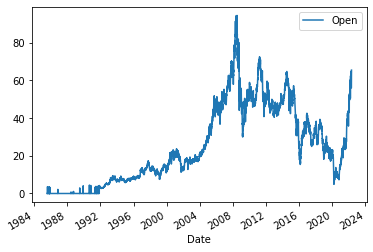

In [11]:
Devon_share_price_data.plot(x="Date", y="Open")

In [12]:
Devon.dividends

Date
1993-06-09    0.015
1993-09-09    0.015
1993-12-09    0.015
1994-03-09    0.015
1994-06-09    0.015
              ...  
2021-03-12    0.300
2021-06-11    0.340
2021-09-10    0.490
2021-12-09    0.840
2022-03-11    1.000
Name: Dividends, Length: 118, dtype: float64

<AxesSubplot:xlabel='Date'>

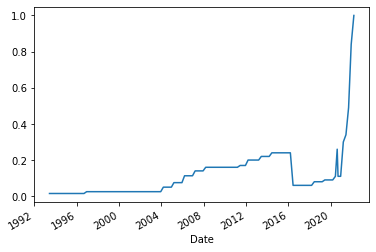

In [13]:
Devon.dividends.plot()

In [21]:
url= "https://www.macrotrends.net/stocks/charts/DVN/devon-energy/revenue"
html_data = requests.get(url).text

In [22]:
beautiful_soup = BeautifulSoup(html_data, 'html5lib')
beautiful_soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"><!--<![endif]--><head>
        <meta charset="utf-8"/>
        <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
		<link href="https://www.macrotrends.net/stocks/charts/DVN/devon-energy/revenue" rel="canonical"/>
		<title>Devon Energy Revenue 2010-2022 | DVN | MacroTrends</title>
		<meta content="Devon Energy annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Devon Energy reve

In [31]:

devon_revenue = pd.DataFrame(columns=["Date", "Revenue"])

devon_table = beautiful_soup.find_all('table', attrs={'class': 'historical_data_table table'})

for table in devon_table:
    if table.find('th').getText().startswith("Devon Energy Quarterly Revenue"):
        for row in table.find_all("tr"):
            col = row.find_all("td") 
            if len(col) == 2: 
                date = col[0].text
                revenue = col[1].text.replace('$', '').replace(',','')
                devon_revenue = devon_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
devon_revenue.head()

,Date,Revenue
0,2022-03-31,3812
1,2021-12-31,4561
2,2021-09-30,3466
3,2021-06-30,2417
4,2021-03-31,1762


In [33]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [34]:
make_graph(devon_data, devon_revenue, 'Tesla')

NameError: name 'devon_data' is not defined